# Tensors
A tensor is essentially a matrix that can have multiple discrete dimensions. For example, a 2D tensor can represent a grayscale or black and white image. Similarly, a 3D tensor can represent a multi-channel color image. Lastly, a 4D tensor can represent a sequence of images.

Among many of the features that PyTorch tensors provide, some important ones are as follows:
- Efficient computation on both CPU and GPU (*NumPy doesn't support GPU*)
- Automatic differentiation (*NumPy doesn't have this capability*)
- Efficient data Input/Output

In [1]:
import numpy as np
import pandas as pd
import torch

# fastai is a higher level library for PyTorch
from fastai.vision.all import *

In [2]:
# Check PyTorch Version
torch.__version__

'2.0.0+cu118'

# Initializing Tensor

Tensors can run both in CPU and GPU. `torch.cuda.is_available()` is a convenient function to check if your environment supports GPU.

In [3]:
# setting device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


A `Tensor` can be created from a Python list, with a designated data type, and on a specified device. The `requires_grad` tells whether to compute gradients for any operation with this variable. We will explore this autograd functionality later in this tutorial.

In [4]:
x = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float64, device=device, requires_grad=True)
x

tensor([1., 2., 3., 4., 5.], device='cuda:0', dtype=torch.float64,
       requires_grad=True)

Each instances of a `Tensor` object has the following usefult properties.
- `ndim` returns the number of *axes* or *dimensions* of the tensor. It is also called the *rank* of a tensor. For example, the above tensor has rank of 1 since it has only 1 axis. In contrast, a $5\times10$ tensor will have a rank of 2 since it has 2 axes (rows and columns).
- `shape` returns the length of each axis or rank. For example, a $15\times10\times5$ tensor has 3 dimensions or axes, and the shape of each axes are 15, 10, and 5 respectively.

In [5]:
print('Total number of elements: ', x.numel())
print('Data type of each element: ', x.dtype)
print('Rank/Dimension: ', x.ndim)
print('Length of each dimension: ', x.shape)
print(x.requires_grad)
print(x.device)

Total number of elements:  5
Data type of each element:  torch.float64
Rank/Dimension:  1
Length of each dimension:  torch.Size([5])
True
cuda:0


### `tensor()` Vs. `as_tensor()` Vs. `from_numpy()`

- `torch.tensor()` always copies data and discards and previous autograd history.
- If you do not want to copy data and share autograd history, you may use `torch.as_tensor()`.
- `torch.from_numpy()` creates a tensor that shares storage with a NumPy array.

In [6]:
y = np.arange(5, dtype=np.float32)
y

array([0., 1., 2., 3., 4.], dtype=float32)

In [7]:
z = torch.from_numpy(y)
z

tensor([0., 1., 2., 3., 4.])

Modification to `z` will be reflected on `y` and vice-versa since they share memory storage now.

In [8]:
z[0] = 100.75
print(z)
print(y)

tensor([100.7500,   1.0000,   2.0000,   3.0000,   4.0000])
[100.75   1.     2.     3.     4.  ]


But, if you use the `tensor` function, the values of y is copied to z and they are not using the same memory address. So, any change in z will not be reflected in y and vice-versa.

In [9]:
z = torch.tensor(y)
z

tensor([100.7500,   1.0000,   2.0000,   3.0000,   4.0000])

In [10]:
z[0] = 500.75
print(z)
print(y)

tensor([500.7500,   1.0000,   2.0000,   3.0000,   4.0000])
[100.75   1.     2.     3.     4.  ]


However, if your use the `as_tensor` function, the values of y is not copied to z and they are using the ame memory address. So, any change in z will be reflected in y and vice-versa.

In [11]:
z = torch.as_tensor(y)
z

tensor([100.7500,   1.0000,   2.0000,   3.0000,   4.0000])

As evident below, both `y` and `z` have different memory addresses.

In [12]:
z[0] = 125.90
print(z)
print(y)

tensor([125.9000,   1.0000,   2.0000,   3.0000,   4.0000])
[125.9   1.    2.    3.    4. ]


We can also convert a `tensor` back to a `ndarray` using the `numpy()` function.

In [13]:
z.numpy()

array([125.9,   1. ,   2. ,   3. ,   4. ], dtype=float32)

We can also create a `tensor` from a `Pandas` `Series` data structure. We can simply convert a `Series` into a `ndarray` using the `values` property. Then we can simply use the `as_tensor` or `from_numpy` function to create a new `tensor`.

In [14]:
series = pd.Series([1, 2, 3, 4, 5, 6],
                    index=['January', 'February', 'March', 'April', 'May', 'June'])
series

January     1
February    2
March       3
April       4
May         5
June        6
dtype: int64

In [15]:
torch.as_tensor(series.values)

tensor([1, 2, 3, 4, 5, 6])

### Shorthands for Tensor Initialization

There are several useful shorthands for quickly creating tensors of arbitrary shapes.

In [16]:
x = torch.empty((3, 3))
y = torch.zeros((2, 2))
z = torch.ones((3, 3))
p = torch.rand((2, 2))
q = torch.eye(5, 5)

In [17]:
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


A useful function for plotting mathematical functions is <code>torch.linspace()</code> and `torch.arange()`. <code>torch.linspace()</code> returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter <code>steps</code> indicates the number of samples to generate.

In [18]:
x = torch.arange(start=10, end=20, step=5)
y = torch.linspace(start=10, end=20, steps=5)

In [19]:
print(x)
print(y)

tensor([10, 15])
tensor([10.0000, 12.5000, 15.0000, 17.5000, 20.0000])


Finally, we can use `tolist` function to convert a `tensor` directly to a `Python` list.

In [20]:
y.tolist()

[10.0, 12.5, 15.0, 17.5, 20.0]

# Type Casting
Sometimes you might need to change the data type of a tensor that you have already created. There are two different ways to that in PyTorch.

In [21]:
x = torch.arange(4)
print(x)
print(x.dtype)

tensor([0, 1, 2, 3])
torch.int64


In [22]:
# convert to boolean
print(x.bool())
# convert to int16
print(x.short())
# convert to int64
print(x.long())
# convert to float16
print(x.half())
# convert to float32
print(x.float())
# convert to float64
print(x.double())

tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.], dtype=torch.float64)


It is also possible to typecast using the `to` function, and giving the intended `torch` type as a parameter.

In [23]:
# convert to boolean
print(x.to(torch.bool))
# convert to int16
print(x.to(torch.int16))
# convert to int64
print(x.to(torch.int64))
# convert to float16
print(x.to(torch.float16))
# convert to float32
print(x.to(torch.float32))
# convert to float64
print(x.to(torch.float64))

tensor([False,  True,  True,  True])
tensor([0, 1, 2, 3], dtype=torch.int16)
tensor([0, 1, 2, 3])
tensor([0., 1., 2., 3.], dtype=torch.float16)
tensor([0., 1., 2., 3.])
tensor([0., 1., 2., 3.], dtype=torch.float64)


# Math Operations

In [24]:
x = torch.tensor([1, 2, 3])
y = torch.tensor([4, 5, 6])

In [25]:
# addition
z = x + y
print(z)
# subtraction
z = x - y
print(z)
# element-wise division
z = x / y
print(z)

tensor([5, 7, 9])
tensor([-3, -3, -3])
tensor([0.2500, 0.4000, 0.5000])


In [26]:
# inplace operations, more efficient
x.add_(y)
print(x)
x.subtract_(y)
print(x)
x.pow_(2)
print(x)

tensor([5, 7, 9])
tensor([1, 2, 3])
tensor([1, 4, 9])


In [27]:
# matrix multiplication
x = torch.rand((4, 2))
y = torch.rand((2, 5))
x.mm(y)

tensor([[0.3561, 0.4200, 0.0603, 0.1983, 0.4356],
        [0.7158, 0.2646, 0.1930, 0.1444, 0.4683],
        [0.8573, 0.3876, 0.2224, 0.2040, 0.6106],
        [0.0629, 0.0137, 0.0181, 0.0085, 0.0344]])

In [28]:
# batch matrix multiplication
batch = 64
x = torch.rand((batch, 10, 20))
y = torch.rand((batch, 20, 30))
x.bmm(y).shape

torch.Size([64, 10, 30])

In [29]:
# element-wise multiplication
x = torch.arange(5)
y = torch.arange(5, 10)
x * y

tensor([ 0,  6, 14, 24, 36])

In [30]:
# dot product
x.dot(y)

tensor(80)

### Logical Operataions

In [31]:
x = torch.rand((5))
y = torch.rand((5))
print(x)
print(y)

tensor([0.7118, 0.1709, 0.5354, 0.2788, 0.6079])
tensor([0.3637, 0.1844, 0.2946, 0.8069, 0.5260])


In [32]:
print(x < y)
print(x > y)
print(x == y)
print(x != y)

tensor([False,  True, False,  True, False])
tensor([ True, False,  True, False,  True])
tensor([False, False, False, False, False])
tensor([True, True, True, True, True])


In [33]:
torch.sum((x != y))

tensor(5)

# Broadcasting
PyTorch, when it tries to perform a simple operation between two tensors of different ranks, will use broadcasting: it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. For example, you can not add a $[3\times 3]$ matrix with a $[3\times 4]$ matrix beacuse the later has an extra column and there is nothing left to add with it after you have added the first $3$ with each other. However, if you add a $[3\times 3]$ matrix with a $[1\times 3]$ vector, you can add the vector with each row of the matrix. Here, the $[1\times 3]$ vector, which has smaller rank, is expanded to $[3\times 3]$ matrix by repeating the $[1\times 3]$ vector $3$ times. Consider the following image.

![Broadcasting](./images/broadcasting.png "Broadcasting")

<small>This image was taken from **Python Data Science Handbook: Essential Tools for Working with Data 1st Edition by Jake VanderPlas**.</small>

### Boradcasting with a Scalar

In [37]:
t = torch.tensor([
    [1, 2, 3],
    [3, 4, 5],
    [5, 6, 7]
])
print(t)

tensor([[1, 2, 3],
        [3, 4, 5],
        [5, 6, 7]])


In this example, the shape of $t$ is $[3\times 3]$. Now, if we substract $5$, which is a scalar, from $t$, PyTorch will consider a matrix of $5$ of the same shape $[3\times 3]$ as $t$ like the following
$$
[
    [5, 5, 5],\\
    [5, 5, 5],\\
    [5, 5, 5]
]
$$
and substract it from $t$ using the normal elementwise substraction. **However, PyTorch will never actually create this matrix so that it can save memory.** As you can see below, $5$ is substracted from each element of $t$.

In [38]:
t - 5

tensor([[-4, -3, -2],
        [-2, -1,  0],
        [ 0,  1,  2]])

### Broadcasting with a Vector

In [51]:
print('Tensor: ', t)
print('Number of dimensions: ', t.ndim)
print('Length of each dimension: ', t.shape)

Tensor:  tensor([[1, 2, 3],
        [3, 4, 5],
        [5, 6, 7]])
Number of dimensions:  2
Length of each dimension:  torch.Size([3, 3])


In [52]:
v = torch.tensor([[1, 2, 3]])
print('Vector: ', v)
print('Number of dimensions: ', v.ndim)
print('Length of each dimension: ', v.shape)

Vector:  tensor([[1, 2, 3]])
Number of dimensions:  2
Length of each dimension:  torch.Size([1, 3])


If we add the vector $v$ to the matrix $t$, the vector will be expanded to match the dimension of the matrix $t$. The vector will act like a matrix of the same shape of $t$ like the following.

In [53]:
v.expand_as(t)

tensor([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]])

Now we can add it with matrix $t$.

In [54]:
t + v.expand_as(t)

tensor([[ 2,  4,  6],
        [ 4,  6,  8],
        [ 6,  8, 10]])

Boradcasting does this expansion automatically whenever you are performing any mathematical operation between tensors that have different ranks.

In [55]:
t + v

tensor([[ 2,  4,  6],
        [ 4,  6,  8],
        [ 6,  8, 10]])

### General Rule
When operating on two tensors, PyTorch compares their shapes elementwise. It starts with the trailing dimensions and works its way backward, adding $1$ when it meets empty dimensions. Two dimensions are compatible when one of the following is true:
- They are equal.
- One of them is $1$, in which case that dimension is broadcast to make it the same as the other.

In [57]:
x = torch.rand((64, 3, 256, 256))
y = torch.rand((256, 256))

print('Dimension of x: ', x.ndim)
print('Length of each dimension of x: ', x.shape)
print()
print('Dimension of y: ', y.ndim)
print('Length of each dimension of y: ', y.shape)

Dimension of x:  4
Length of each dimension of x:  torch.Size([64, 3, 256, 256])

Dimension of y:  2
Length of each dimension of y:  torch.Size([256, 256])


Now, start comparing the lengths of each dimension from the end. In the last dimension, both $x$ and $y$ have $256$. The same is true for the $2^{nd}$ from the last dimension. After that, $x$ has extra $2$ dimensions which $y$ does not have, but we can simply add two extra dimensions in $y$ using the `unsqueeze` function.

In [62]:
y = y.unsqueeze(0)
print(y.shape)
y = y.unsqueeze(0)
print(y.shape)

torch.Size([1, 256, 256])
torch.Size([1, 1, 256, 256])


Now, the lengths of each dimension in both $x$ and $y$ are either same or one of them is $1$. So, our rule holds. We can perform any mathematical operation between them as we like. **However, PyTorch does these `unsqueeze` operations automatically.** 

# Useful Functions
**It is often better to avoid loops and use these functions to speed up performance.
Raw Python loops are too slow. To levelrage the underlying `C` codes of `PyTorch`,
avoid them.**

In [64]:
x = torch.tensor([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10]
])
x

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

In [65]:
# row-wise sum
print(x.sum(dim=0))
# column-wise sum
print(x.sum(dim=1))

tensor([ 7,  9, 11, 13, 15])
tensor([15, 40])


In [66]:
# returns the minimum element of each column
print(x.min(dim=0))
print()
# returns the minimum element of each row
print(x.min(dim=1))

torch.return_types.min(
values=tensor([1, 2, 3, 4, 5]),
indices=tensor([0, 0, 0, 0, 0]))

torch.return_types.min(
values=tensor([1, 6]),
indices=tensor([0, 0]))


In [67]:
# returns the maximum element of each row
print(x.max(dim=1))
print()
# returns the maximum element of each column
print(x.max(dim=0))

torch.return_types.max(
values=tensor([ 5, 10]),
indices=tensor([4, 4]))

torch.return_types.max(
values=tensor([ 6,  7,  8,  9, 10]),
indices=tensor([1, 1, 1, 1, 1]))


In [69]:
# returns the position of the maximum element row-wise
print(x.argmax(dim=0))
# returns the position of the maximum element column-wise
print(x.argmax(dim=1))

tensor([1, 1, 1, 1, 1])
tensor([4, 4])


In [70]:
# returns the position of the minimum element row-wise
print(x.argmin(dim=0))
# returns the position of the minimum element column-wise
print(x.argmin(dim=1))

tensor([0, 0, 0, 0, 0])
tensor([0, 0])


In [71]:
# returns means of each column
print(torch.mean(x.float(), dim=0))

tensor([3.5000, 4.5000, 5.5000, 6.5000, 7.5000])


In [72]:
# sorts tensor
x = torch.rand(10)
print(x)
x, indices = x.sort(descending=False)
print(x)
print(indices)

tensor([0.8941, 0.7084, 0.3669, 0.9765, 0.6829, 0.5882, 0.6227, 0.7009, 0.1127,
        0.3972])
tensor([0.1127, 0.3669, 0.3972, 0.5882, 0.6227, 0.6829, 0.7009, 0.7084, 0.8941,
        0.9765])
tensor([8, 2, 9, 5, 6, 4, 7, 1, 0, 3])


In [73]:
# clamp tensor between values
x = torch.tensor([0, 1, 4, 5, 6, 7, 10, 11])
print(x)
# any element less than 2 is set to 2, and any element more than 10 is set to 10
x = x.clamp(min=2, max=10)
print(x)

tensor([ 0,  1,  4,  5,  6,  7, 10, 11])
tensor([ 2,  2,  4,  5,  6,  7, 10, 10])


In [74]:
x = torch.tensor([0, 0, 1, 1, 1], dtype=torch.bool)
# checks if any of the values is true
print(x.any())
# checks if all the values are true
print(x.all())

tensor(True)
tensor(False)


# Indexing
The contents of a tensor can be accessed and modified using Python’s indexing and slicing notation.

In [75]:
batch_size = 64
feature_size = (3, 256, 256)

img = torch.rand((batch_size, *feature_size))

In [76]:
# selecting first image
print(img[0].shape)
# selecting first color channel of first image
print(img[0, 0].shape)
# selecting first row of first color channel of first image
print(img[0, 0, 0].shape)
# slecting first column of first color channel of first image
print(img[0, 0, :, 0].shape)

torch.Size([3, 256, 256])
torch.Size([256, 256])
torch.Size([256])
torch.Size([256])


The number on the left side of the colon represents the index of the first value. The number on the right side of the colon is always 1 larger than the index of the last value. For example, <code>tensor_sample\[1:4]</code> means you get values from the index 1 to index 3 <i>(4-1)</i>.

In [77]:
# selecting 3rd column of 2nd color channel of all images
print(img[:, 1, :, 2].shape)
# selecting 3rd column of 2nd color channel of first 10 images
print(img[:10, 1, :, 2].shape)

torch.Size([64, 256])
torch.Size([10, 256])


### Fancy Indexing

We can leverage fancy indexing and use boolean conditions to select specific values too.

In [78]:
x = torch.tensor([1, 2, 3, 4, 5])
print(x < 4)
print(x[x < 4])
print((x < 2) | (x > 4))
print(x[(x < 2) | (x > 4)])
print((x < 3) & (x < 2))
print(x[(x < 3) & (x < 2)])

tensor([ True,  True,  True, False, False])
tensor([1, 2, 3])
tensor([ True, False, False, False,  True])
tensor([1, 5])
tensor([ True, False, False, False, False])
tensor([1])


The `where` function returns elements as it is if condition is met, otherwise changes value according to given formulae.

In [79]:
x.where(x < 2, x + 100)

tensor([  1, 102, 103, 104, 105])

The `unique` function returns the unique elements in the list.

In [80]:
x.unique()

tensor([1, 2, 3, 4, 5])

Use `torch.Tensor.item()` to get a Python number from a tensor containing a single value.

In [81]:
# Returns a single item
x[0].item()

1

If we can select a specific value or a range of values from a `tensor`, we can also assign new values to those positions. For example, below we have selected the first 2 items of `x` and assigned new values to them.

In [82]:
print(x)

tensor([1, 2, 3, 4, 5])


In [83]:
x[0:2] = torch.tensor([100, 101])
x

tensor([100, 101,   3,   4,   5])

# Reshaping & Resizing
For some operations, the input tensors need to have a certain number of dimensions (also called rank) and a certain number of elements (shape). So, we might have to change the shape of a tensor, add a new dimension, or make a dimension smaller that isn't needed.

In [84]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [85]:
print(x.shape)
print(x.ndim)

torch.Size([12])
1


The `view` function can be used to reshape a vector. For example, before `x` was a 1 dimensional vector. Later we reshaped it into a 2 dimensional matrix with 3 rows and 4 columns. The number of elements in a tensor must remain constant after applying view.

In [86]:
x_reshaped = x.view(3, 4)
x_reshaped

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [87]:
print(x_reshaped.shape)
print(x_reshaped.ndim)

torch.Size([3, 4])
2


 However, `view` requires contiguous memory, in contrast to `reshape`. Therefore, `reshape` is safe to use in expanse of performance.

In [88]:
print(x.reshape(3, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


If you have a tensor with dynamic size, you can use `-1` to represent any size. But you can set only one dimension as `-1`. It means that `PyTorch` will calculate the suitable number for that dimension by itself.

In [89]:
x.view(-1, 4)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

We can concatenate two tensors both row-wise and column-wise.

In [90]:
# concatenates two tensors
x = torch.rand((3, 3))
y = torch.rand((3, 3))

In [91]:
# concatenates x and y column-wise
print(torch.cat((x, y), dim=0))

tensor([[0.5010, 0.8989, 0.1619],
        [0.1088, 0.6318, 0.7611],
        [0.6168, 0.1788, 0.2481],
        [0.6397, 0.5900, 0.2518],
        [0.4200, 0.1559, 0.5479],
        [0.8271, 0.1436, 0.7733]])


In [92]:
# concatenates x and y row-wise
print(torch.cat((x, y), dim=1))

tensor([[0.5010, 0.8989, 0.1619, 0.6397, 0.5900, 0.2518],
        [0.1088, 0.6318, 0.7611, 0.4200, 0.1559, 0.5479],
        [0.6168, 0.1788, 0.2481, 0.8271, 0.1436, 0.7733]])


We can divide a `tensor` into multiple chunks using the `chunk` function.

In [93]:
x_chunks = torch.chunk(x, 3)
for chunk in x_chunks:
    print(chunk)

tensor([[0.5010, 0.8989, 0.1619]])
tensor([[0.1088, 0.6318, 0.7611]])
tensor([[0.6168, 0.1788, 0.2481]])


Sometimes we might need splits of different sizes. We can use the `split` function instead and define the size of each splits manually.

In [94]:
x_chunks = torch.split(x, split_size_or_sections=[2, 1])
for chunk in x_chunks:
    print(chunk)

tensor([[0.5010, 0.8989, 0.1619],
        [0.1088, 0.6318, 0.7611]])
tensor([[0.6168, 0.1788, 0.2481]])


In [95]:
# unrolling all elements
x.reshape(-1)

tensor([0.5010, 0.8989, 0.1619, 0.1088, 0.6318, 0.7611, 0.6168, 0.1788, 0.2481])

In [96]:
print(img.shape)
# converting 2d color images into a vector of pixels
print(img.reshape(64, -1).shape)

torch.Size([64, 3, 256, 256])
torch.Size([64, 196608])


In [97]:
# swapping dimensions, changing colour channel dimension to the last
print(img.permute(0, 2, 3, 1).shape)

torch.Size([64, 256, 256, 3])


The `squeeze` function removes the given dimension, whereas the `unsqueeze` function adds an extra dimension.

In [98]:
# add and remove a single dimension to the existing one
x = torch.arange(10)
print(x)
x = x.unsqueeze(0)
print(x.shape)
x = x.unsqueeze(2)
print(x.shape)
x = x.squeeze(0)
print(x.shape)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
torch.Size([1, 10])
torch.Size([1, 10, 1])
torch.Size([10, 1])


# Digit Classification
In this short exercise, we will be building a naive **baseline** classifier to classify digits $3$ and $7$. We will utilize the `fast.ai` repository's MNIST SAMPLE dataset that only contains digits $3$ and $7$.

In [99]:
# Loads MNIST dataset from Fast.ai repository
# This trimmed dataset contains only 3s and 7s
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('C:/Users/musab/.fastai/data/mnist_sample')

fast.ai API returns the path to the downloaded dataset. The path is not just a string, rather it is a python Path object Learn more from [**documentation**](https://docs.python.org/3/library/pathlib.html). Or watch this [**tutorial**](https://www.youtube.com/watch?v=YwhOUyTxXVE) for a quick introduction. The new path object comes with many unix commands baked into itself for convenience.

In [100]:
print(path.ls())

[Path('C:/Users/musab/.fastai/data/mnist_sample/labels.csv'), Path('C:/Users/musab/.fastai/data/mnist_sample/train'), Path('C:/Users/musab/.fastai/data/mnist_sample/valid')]


The `/` operator is one of the most convenient shorthands for creating new paths.

In [101]:
print((path / 'train').ls())

[Path('C:/Users/musab/.fastai/data/mnist_sample/train/3'), Path('C:/Users/musab/.fastai/data/mnist_sample/train/7')]


In [102]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

print(threes[:3])
print()
print(sevens[:3])

[Path('C:/Users/musab/.fastai/data/mnist_sample/train/3/10.png'), Path('C:/Users/musab/.fastai/data/mnist_sample/train/3/10000.png'), Path('C:/Users/musab/.fastai/data/mnist_sample/train/3/10011.png')]

[Path('C:/Users/musab/.fastai/data/mnist_sample/train/7/10002.png'), Path('C:/Users/musab/.fastai/data/mnist_sample/train/7/1001.png'), Path('C:/Users/musab/.fastai/data/mnist_sample/train/7/10014.png')]


In [103]:
print(len(threes))
print(len(sevens))

6131
6265


In [104]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]

len(three_tensors), len(seven_tensors)

(6131, 6265)

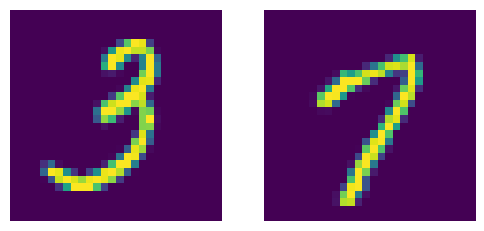

In [105]:
show_images((three_tensors[15], seven_tensors[10]))

In [107]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255

print(stacked_threes.shape)
print(stacked_sevens.shape)

torch.Size([6131, 28, 28])
torch.Size([6265, 28, 28])


Our idea is to find the mean representation of $3$ and $7$. Then for any new digit,
we will compute the distance from the digit to both $3$ and $7$. We will predict the
digit with the smallest distance between the two. Next, we will calculate the average
representation of the digits $3$ and $7$.

<Axes: >

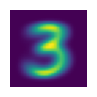

In [108]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

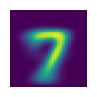

In [109]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

Next we will create some functions to calculate distance between two images, and
also to predict digit.

In [110]:
def l1_distance(img1: tensor, img2: tensor) -> tensor:
    """Function to calculate average l1 distance or the mean absolute error between
    two images."""
    return (img1 - img2).abs().mean((-1, -2))

In [111]:
def predict(img: tensor) -> int:
    """Returns 3 if the distance between given image and average image of the
    digit 3 is smaller than that of digit 7. Returns 7 otherwise."""
    mask = l1_distance(img, mean3) < l1_distance(img, mean7)
    mask = torch.where(mask, torch.tensor(3), torch.tensor(7))
    return mask

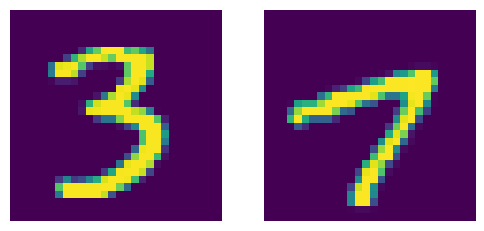

In [112]:
a_3 = stacked_threes[1]
a_7 = stacked_sevens[12]

show_images((a_3, a_7))

In [113]:
print(predict(a_3))
print(predict(a_7))

tensor(3)
tensor(7)


Our model worked well on the training data. Let's load the validation data and 
measure the performance.

In [114]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float() / 255

valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()]) 
valid_7_tens = valid_7_tens.float() / 255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Next, we will combine the $3$ and $7$ tensors to a single dataset.

In [115]:
valid_data_x = torch.cat([valid_3_tens, valid_7_tens])
valid_data_x.shape

torch.Size([2038, 28, 28])

We will create a tensor to store the actual labels.

In [116]:
valid_data_y = torch.tensor([3] * valid_3_tens.shape[0] + [7] * valid_7_tens.shape[0])
valid_data_y.shape

torch.Size([2038])

Finally, we will predict and compute the accuracy.

In [117]:
predictions = predict(valid_data_x)

In [118]:
# Accuracy
acc = torch.sum(predictions == valid_data_y) / len(predictions) * 100
acc.item()

95.14229583740234